# Recommendation System using Matrix Factorization in Python
###### The Matix


### First we import the libraries necessary to us

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Then we import the datasets
### Here ratings stores the dataset of the ratings and movies stores the dataset for movies.

In [44]:
ratings="https://github.com/couturierc/tutorials/raw/master/recommender_system/data/ratings.csv"
movies="https://github.com/couturierc/tutorials/raw/master/recommender_system/data/movies.csv"


# If data stored locally
# ratings="./data/ratings.csv"
# movies="./data/movies.csv"

df_ratings = pd.read_csv(ratings, sep=',')                     # read_csv reads the given link i.e ratings and the separation used is a comma ','
df_ratings.columns = ['userId', 'itemId', 'rating', 'timestamp']
df_movies = pd.read_csv(movies, sep=',')                       # read_csv reads the given link i.e movies and the separation used is a comma ','
df_movies.columns = ['itemId', 'title', 'genres']

In [45]:
df_movies.head(10)    #head() gives the top 5 data. But by entering 10 as a parameter, we get top 10 datasets.


,itemId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
5,6,Heat (1995),Action|Crime|Thriller
6,7,Sabrina (1995),Comedy|Romance
7,8,Tom and Huck (1995),Adventure|Children
8,9,Sudden Death (1995),Action
9,10,GoldenEye (1995),Action|Adventure|Thriller


In [46]:
df_ratings.head(10)      #head() gives the top 5 data. But by entering 10 as a parameter, we get top 10 datasets.

,userId,itemId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
5,1,70,3.0,964982400
6,1,101,5.0,964980868
7,1,110,4.0,964982176
8,1,151,5.0,964984041
9,1,157,5.0,964984100


In [47]:
df_movies.describe()

,itemId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [48]:
df_ratings.describe()

,userId,itemId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


# We can represent the given datasets in the form of histograms too. Here we are using matplotlib library to do so.
## Using the histograph below, we can visualse what ratings do most of the users give.


<AxesSubplot:>

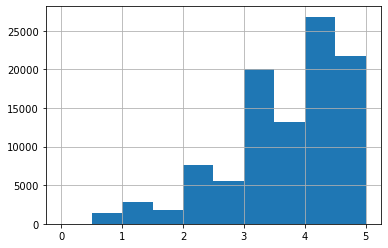

In [49]:
#df_ratings.rating.hist(bins=8)    this is also correct as it says that the no. of class intervals i.e bins is 8.
df_ratings.rating.hist(bins=np.arange(0,5.5,0.5))  #this function takes the starting value, the ending value and the class length as the parameters and returns the number of intervals so formed.

### Using the histogram below, we can visualise the timeframe where the ratings were given by the users.

<AxesSubplot:>

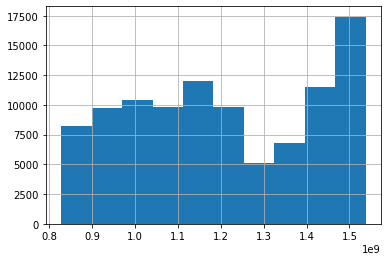

In [50]:
df_ratings.timestamp.hist()


# Colaborative Filtering
## The first step of a colaborative filtering is to build a item-user matrix.This is also called a pivot matrix.
## We are using usersID for the rows of the matrix and ItemId for the column of the matrix. This matrix is a very sparse matrix.


In [51]:
##### FILL HERE (1 line) ######
df_user_item = df_ratings.pivot(index='userId', columns='itemId',values='rating')

# Sort index/rows (userId's) and columns (itemId's)

df_user_item.sort_index(axis=0, inplace=True)
df_user_item.sort_index(axis=1, inplace=True)
df_user_item.head()



itemId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,4.0,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [52]:
df_user_item.describe()

itemId,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
count,215.000000,110.000000,52.000000,7.000000,49.000000,102.000000,54.000000,8.000000,16.000000,132.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,3.920930,3.431818,3.259615,2.357143,3.071429,3.946078,3.185185,2.875000,3.125000,3.496212,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
std,0.834859,0.881713,1.054823,0.852168,0.907148,0.817224,0.977561,1.125992,0.974679,0.859381,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.500000,0.500000,0.500000,1.000000,0.500000,1.000000,1.000000,1.000000,1.500000,0.500000,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
25%,3.500000,3.000000,3.000000,1.750000,3.000000,3.125000,3.000000,2.750000,2.875000,3.000000,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
50%,4.000000,3.500000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,3.500000,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
75%,4.500000,4.000000,4.000000,3.000000,3.500000,4.500000,4.000000,3.000000,3.250000,4.000000,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0
max,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,3.5,3.0,4.0,4.0,3.5,4.0,3.5,3.5,3.5,4.0


# Approximating SVD with Stochastic Gradient Descent

# Singular Value Decomposition decomposes a matrix $R$ into the best lower rank (i.e. smaller/simpler) approximation of the original matrix $R$. Mathematically, it decomposes R into a two unitary matrices and a diagonal matrix:

$$\begin{equation}
R = U\Sigma V^{T}
\end{equation}$$
where:

R is users's ratings matrix, 

$U$ is the user "features" matrix, it represents how much users "like" each feature,

$\Sigma$ is the diagonal matrix of singular values (essentially weights),

$V^{T}$ is the movie "features" matrix,

it represents how relevant each feature is to each movie,with $U$ and $V^{T}$ orthogonal.

### But SVD is not possible for a sparse matrix. Putting 0 or the mean in the blank spaces will make it dense.But that approach is not feasible.Hence, we use gradient descent algorithm to do so.

#### We inject  Σ  into U and V, and try to find P and q such that  𝑅ˆ=𝑃𝑄𝑇  is close to  𝑅  for the item-user pairs already rated.

#### A first function to simplify the entries (userId/itemId) : we map the set of

In [54]:
def encode_ids(data):
    '''Takes a rating dataframe and return: 
    - a simplified rating dataframe with ids in range(nb unique id) for users and movies
    - 2 mapping disctionaries
    
    '''

    data_encoded = data.copy()
    
    users = pd.DataFrame(data_encoded.userId.unique(),columns=['userId'])  # df of all unique users
    dict_users = users.to_dict()    
    inv_dict_users = {v: k for k, v in dict_users['userId'].items()}

    items = pd.DataFrame(data_encoded.itemId.unique(),columns=['itemId']) # df of all unique items
    dict_items = items.to_dict()    
    inv_dict_items = {v: k for k, v in dict_items['itemId'].items()}

    data_encoded.userId = data_encoded.userId.map(inv_dict_users)
    data_encoded.itemId = data_encoded.itemId.map(inv_dict_items)

    return data_encoded, dict_users, dict_items

 



In [55]:
# Adapted from http://nicolas-hug.com/blog/matrix_facto_4
def SGD(data,           # dataframe containing 1 user|item|rating per row
        n_factors = 10, # number of factors
        alpha = .01,    # number of factors
        n_epochs = 1,   # number of iteration of the SGD procedure
       ):
    '''Learn the vectors P and Q (ie all the weights p_u and q_i) with SGD.
    '''

    # Encoding userId's and itemId's in data
    data, dict_users, dict_items = encode_ids(data)
    
    ##### FILL HERE (2 lines) ######
    n_users = data.userId.nunique()  # number of unique users
    n_items = data.itemId.nunique() # number of unique items
    ################################
    
    # Randomly initialize the user and item factors.
    p = np.random.normal(0, .1, (n_users, n_factors))
    q = np.random.normal(0, .1, (n_items, n_factors))

    # Optimization procedure
    for epoch in range(n_epochs):
        print ('epoch: ', epoch)
        # Loop over the rows in data
        for index in range(data.shape[0]):
            row = data.iloc[[index]]
            u = int(row.userId)      # current userId = position in the p vector (thanks to the encoding)
            i = int(row.itemId)      # current itemId = position in the q vector
            r_ui = float(row.rating) # rating associated to the couple (user u , item i)
            
            ##### FILL HERE (1 line) ######
            err = r_ui -np.dot(p[u],q[i].transpose())    # difference between the predicted rating (p_u . q_i) and the known ratings r_ui
            ################################
            
            # Update vectors p_u and q_i
            ##### FILL HERE (2 lines) ######
            p_old=p[u]
            p[u] = p[u]+alpha*err*q[i]  # cf. update rule above 
            q[i] = q[i]+alpha*err*p_old
            ################################
            
    return p, q
    
    
def estimate(u, i, p, q):
    '''Estimate rating of user u for item i.'''
    ##### FILL HERE (1 line) ######
    return np.dot(p[u],q[i].transpose())            #scalar product of p[u] and q[i] /!\ dimensions
    ################################

In [56]:
p, q = SGD(df_ratings)


epoch:  0


## Get estimates for all user-item pairs.

In [57]:
df_user_items_filled=pd.DataFrame(np.dot(p,q.transpose()))
df_user_items_filled.head()


,0,1,2,3,4,5,6,7,8,9,...,9714,9715,9716,9717,9718,9719,9720,9721,9722,9723
0,0.075264,0.009224,0.007431,-0.046681,-0.016699,0.031207,0.005273,-0.041072,0.043083,0.024879,...,0.015809,0.013110,-0.033596,-0.035291,0.022626,-0.026252,-0.073580,-0.032956,0.016707,-0.005965
1,0.109542,-0.015001,-0.065044,0.019654,-0.029174,0.010272,0.015252,0.034150,0.049144,0.048003,...,0.091352,0.004875,0.020893,0.033231,0.052439,0.006221,0.039398,-0.055099,0.044112,-0.004728
2,0.008024,0.005864,0.046812,0.005361,0.022057,0.011101,-0.012478,0.011063,-0.010441,-0.014043,...,-0.021764,0.018877,0.009757,-0.031986,-0.007446,0.002044,-0.016178,0.025875,0.030834,0.078035
3,-0.028502,0.065349,0.112506,0.050875,0.010357,0.013508,0.031548,0.107399,-0.019064,-0.011131,...,-0.032935,0.033160,0.020149,0.014066,0.014961,0.016629,-0.001897,0.101487,0.086023,0.071505
4,0.016072,0.063892,0.061334,0.049521,0.068794,0.047321,0.070922,-0.008153,0.037263,-0.016368,...,-0.000436,0.018493,-0.020741,-0.027109,0.016452,-0.019678,-0.064895,0.031319,0.016133,-0.034300


In [58]:
df_ratings_encoded,dict_users,dict_items=encode_ids(df_ratings)

In [59]:
df_user_items_filled.rename(columns=(dict_items['itemId']), inplace=True)
df_user_items_filled.rename(index=(dict_users['userId']),inplace=True)

#for sorting the rows and the columns
df_user_items_filled.sort_index(axis=0,inplace=True)
df_user_items_filled.sort_index(axis=1,inplace=True)
df_user_items_filled.head()

,1,2,3,4,5,6,7,8,9,10,...,193565,193567,193571,193573,193579,193581,193583,193585,193587,193609
1,0.075264,0.035167,0.009224,0.015592,0.062936,0.007431,-0.007484,0.004980,-0.008777,0.065219,...,-0.020291,0.024234,-0.003693,-0.054370,-0.036684,0.067287,-0.021233,0.010935,0.076892,-0.048066
2,0.109542,-0.013313,-0.015001,0.007754,0.042427,-0.065044,-0.006850,-0.030674,0.064923,0.047093,...,-0.000260,-0.023528,-0.031315,-0.047457,-0.022292,-0.000590,0.021408,0.008150,0.007160,-0.016453
3,0.008024,-0.013438,0.005864,0.012262,-0.037833,0.046812,-0.007856,-0.003953,-0.025299,-0.002700,...,0.018154,-0.036010,0.006933,0.063834,-0.007984,0.010011,0.000506,-0.006095,-0.001890,0.029981
4,-0.028502,-0.032927,0.065349,-0.017385,-0.026461,0.112506,0.006545,0.014732,-0.047990,-0.029793,...,0.030360,-0.025968,0.010127,0.082682,0.021297,-0.017414,-0.013840,-0.004314,-0.009949,0.003990
5,0.016072,0.006413,0.063892,-0.010829,0.030289,0.061334,-0.008096,0.013841,0.001001,0.038267,...,0.035091,0.051361,-0.004128,-0.020733,0.001616,0.058412,-0.021341,0.016190,0.036537,-0.030384


In [60]:
df_user_items_filled.loc[1][:10]

1     0.075264
2     0.035167
3     0.009224
4     0.015592
5     0.062936
6     0.007431
7    -0.007484
8     0.004980
9    -0.008777
10    0.065219
Name: 1, dtype: float64

# Giving recommendations to the user
## Here are 10 movie recommendations for user no. N

In [61]:
N=2

In [62]:
list(df_user_items_filled.loc[N])


[0.10954243128996023,
 -0.013312821392201236,
 -0.01500079410221055,
 0.007753799890602898,
 0.04242736816869378,
 -0.06504427118748593,
 -0.006850295417748026,
 -0.03067409925112082,
 0.06492341614984755,
 0.0470931047740368,
 0.06361879877641101,
 -0.05414116210937459,
 0.025730650030711698,
 -0.00047099376016979073,
 -0.00041573560025375385,
 -0.03994237569514147,
 0.012285192360739692,
 -0.04118124291894315,
 0.006886839647674971,
 0.023983511390465603,
 0.009424027878979087,
 0.0461927906786009,
 0.01563371383755046,
 -0.015101068238142513,
 -0.04959832164694821,
 0.027682310500103217,
 -0.031985352334166425,
 0.0003614270393764844,
 -0.0702243557155615,
 -0.012245744935771331,
 0.0998122939568747,
 0.024101018182779186,
 0.0060455952831729234,
 -0.04707795647341563,
 -0.0014784344711801572,
 -0.045948105212998296,
 -0.0020287730272151375,
 -0.01139943921479846,
 0.0028235373834504295,
 -0.0025729792228550014,
 -0.0061880653494085355,
 0.015976280451891745,
 -0.010356195491393431,

In [63]:
recommendations=list((df_user_items_filled.loc[N]).sort_values(ascending=False)[:100].index)
recommendations

[592,
 527,
 318,
 457,
 589,
 296,
 593,
 500,
 588,
 780,
 590,
 356,
 1073,
 349,
 480,
 83270,
 117133,
 1375,
 8773,
 3868,
 1193,
 924,
 165,
 1,
 595,
 80906,
 3147,
 380,
 3753,
 648,
 260,
 91325,
 1080,
 474,
 31,
 2502,
 4248,
 541,
 647,
 5424,
 51545,
 919,
 4890,
 95796,
 6625,
 3844,
 1252,
 146688,
 74791,
 3698,
 1213,
 903,
 141890,
 1135,
 364,
 1047,
 147662,
 164909,
 934,
 1385,
 145418,
 2690,
 2551,
 97860,
 781,
 357,
 40414,
 79091,
 185,
 1334,
 1203,
 2568,
 152081,
 3669,
 736,
 44020,
 45666,
 2896,
 2889,
 60040,
 33085,
 2324,
 4506,
 454,
 6536,
 88448,
 1388,
 118997,
 1586,
 26258,
 4835,
 6454,
 1290,
 4412,
 92954,
 80553,
 1025,
 4080,
 5187,
 1226]

In [64]:
df_movies[df_movies.itemId.isin(recommendations)]

,itemId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
30,31,Dangerous Minds (1995),Drama
138,165,Die Hard: With a Vengeance (1995),Action|Crime|Thriller
156,185,"Net, The (1995)",Action|Crime|Thriller
224,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi
...,...,...,...
9115,145418,Trumbo (2015),Drama
9132,146688,Solace (2015),Fantasy|Mystery|Thriller
9154,147662,Return of the One-Armed Swordsman (1969),Action|Adventure
9223,152081,Zootopia (2016),Action|Adventure|Animation|Children|Comedy
